In [1]:
library(tidyverse)
library(ggpubr)
library(rstatix)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [65]:
# Eickhoff = '/cubric/data/c1639425/Monkey_Brains/results_df/proportion_eickhoff_streamline_corrected_bst_subic_ncc_ant_thal_extglobpal_df'
# geschwin = /cubric/data/c1639425/Monkey_Brains/results_df/proportion_gschwind_bst_ncc_subic_antthal_globpal_df
# Eichoff cols = Subjects,subic_bst,subic_ant_thal,subic_ncc,subic_ext_glob_pal
#geschwind cols = Subjects,bst_subic,subic_ant_thal,ncc_subic,subic_ext_glob_pal
df_wide = read_csv('/cubric/data/c1639425/Monkey_Brains/results_df/proportion_eickhoff_streamline_corrected_bst_subic_ncc_ant_thal_extglobpal_df')

df_wide = df_wide %>%
  select(Subjects,subic_bst,subic_ant_thal,subic_ncc,subic_ext_glob_pal)

print(df_wide)

Parsed with column specification:
cols(
  .default = col_double(),
  Subjects = col_character()
)

See spec(...) for full column specifications.



# A tibble: 9 x 5
  Subjects subic_bst subic_ant_thal subic_ncc subic_ext_glob_pal
  <chr>        <dbl>          <dbl>     <dbl>              <dbl>
1 sub-01     0.0784          0.161   0.00480            0.00356 
2 sub-02     0.0985          0.0454  0.0103             0.0205  
3 sub-03     0.0634          0.0145  0.00808            0.00899 
4 sub-04     0.0354          0.134   0.00276            0.000819
5 sub-05     0.0236          0.149   0.00283            0.00143 
6 sub-06     0.0190          0.105   0.00129            0.000476
7 sub-07     0.00709         0.152   0.000439           0.000365
8 sub-08     0.0508          0.117   0.00255            0.000688
9 sub-09     0.0549          0.207   0.00603            0.00218 


In [67]:
df <- df_wide %>%
  gather(key = "ROI", value = "proportion",subic_bst,subic_ant_thal,subic_ncc,subic_ext_glob_pal) %>%
  convert_as_factor(Subjects, ROI)
print(df)

# A tibble: 36 x 3
   Subjects ROI            proportion
   <fct>    <fct>               <dbl>
 1 sub-01   subic_bst         0.0784 
 2 sub-02   subic_bst         0.0985 
 3 sub-03   subic_bst         0.0634 
 4 sub-04   subic_bst         0.0354 
 5 sub-05   subic_bst         0.0236 
 6 sub-06   subic_bst         0.0190 
 7 sub-07   subic_bst         0.00709
 8 sub-08   subic_bst         0.0508 
 9 sub-09   subic_bst         0.0549 
10 sub-01   subic_ant_thal    0.161  
# … with 26 more rows


In [68]:
sumstats <- df %>%
  group_by(ROI) %>%
  get_summary_stats(proportion, type = "mean_sd")
print(sumstats)

# A tibble: 4 x 5
  ROI                variable       n  mean    sd
  <fct>              <chr>      <dbl> <dbl> <dbl>
1 subic_ant_thal     proportion     9 0.121 0.059
2 subic_bst          proportion     9 0.048 0.03 
3 subic_ext_glob_pal proportion     9 0.004 0.007
4 subic_ncc          proportion     9 0.004 0.003


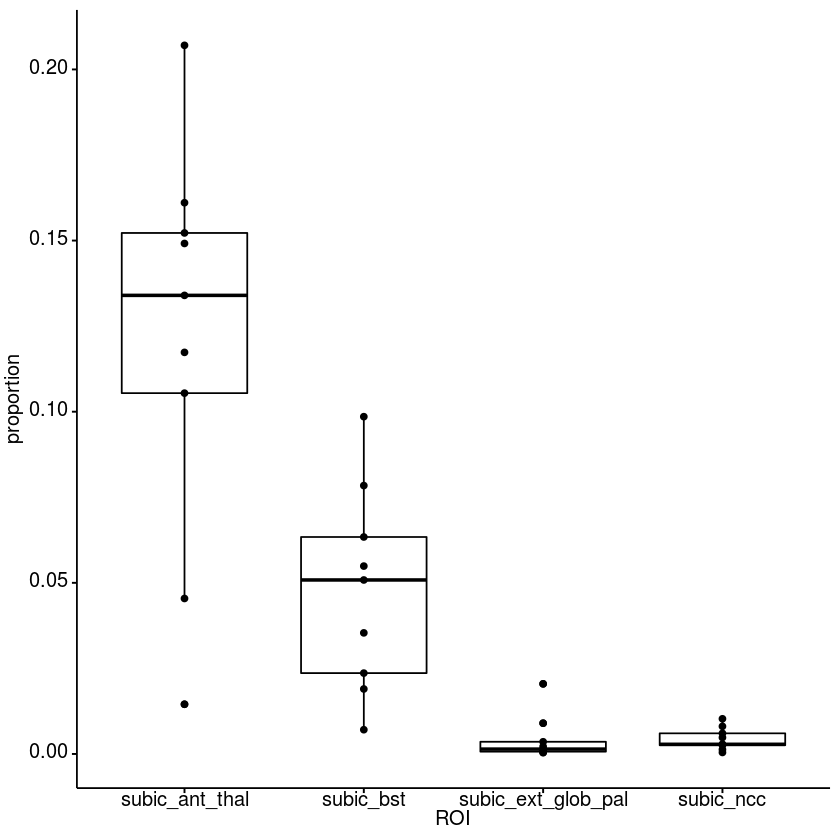

In [69]:
bxp <- ggboxplot(df, x = "ROI", y = "proportion", add = "point")
bxp

In [71]:
# Test for outliers
outliers <- df %>%
  group_by(ROI) %>%
  identify_outliers(proportion)
print(outliers)

# A tibble: 3 x 5
  ROI                Subjects proportion is.outlier is.extreme
  <fct>              <fct>         <dbl> <lgl>      <lgl>     
1 subic_ant_thal     sub-03      0.0145  TRUE       FALSE     
2 subic_ext_glob_pal sub-02      0.0205  TRUE       TRUE      
3 subic_ext_glob_pal sub-03      0.00899 TRUE       FALSE     


In [95]:
# Replace outliers, easier to do this in the wide Df

# Remove completely 
# df_outliers_rm <- df_wide %>% filter(subic_ext_glob_pal < 0.0204)


df_outliers_rm <- df_wide %>% mutate(subic_ext_glob_pal=replace(subic_ext_glob_pal, subic_ext_glob_pal>0.008, NA))

print(df_outliers_rm)

# A tibble: 9 x 5
  Subjects subic_bst subic_ant_thal subic_ncc subic_ext_glob_pal
  <chr>        <dbl>          <dbl>     <dbl>              <dbl>
1 sub-01     0.0784          0.161   0.00480            0.00356 
2 sub-02     0.0985          0.0454  0.0103            NA       
3 sub-03     0.0634          0.0145  0.00808           NA       
4 sub-04     0.0354          0.134   0.00276            0.000819
5 sub-05     0.0236          0.149   0.00283            0.00143 
6 sub-06     0.0190          0.105   0.00129            0.000476
7 sub-07     0.00709         0.152   0.000439           0.000365
8 sub-08     0.0508          0.117   0.00255            0.000688
9 sub-09     0.0549          0.207   0.00603            0.00218 


# A tibble: 36 x 3
   Subjects ROI            proportion
   <fct>    <fct>               <dbl>
 1 sub-01   subic_bst         0.0784 
 2 sub-02   subic_bst         0.0985 
 3 sub-03   subic_bst         0.0634 
 4 sub-04   subic_bst         0.0354 
 5 sub-05   subic_bst         0.0236 
 6 sub-06   subic_bst         0.0190 
 7 sub-07   subic_bst         0.00709
 8 sub-08   subic_bst         0.0508 
 9 sub-09   subic_bst         0.0549 
10 sub-01   subic_ant_thal    0.161  
# … with 26 more rows


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


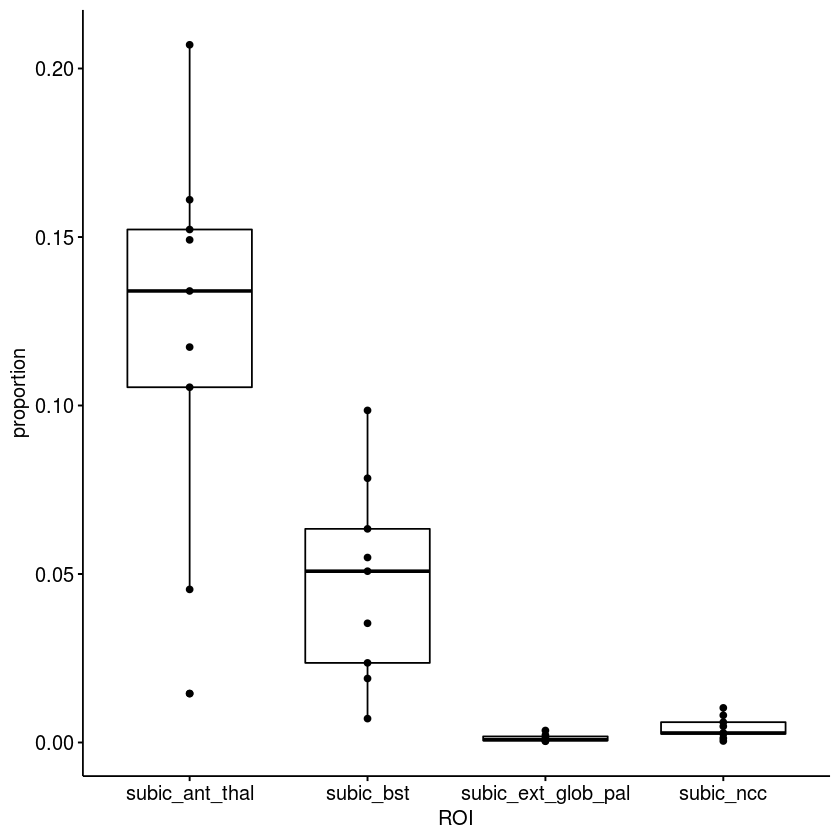

In [97]:
df <- df_outliers_rm %>%
  gather(key = "ROI", value = "proportion",subic_bst,subic_ant_thal,subic_ncc,subic_ext_glob_pal ) %>%
  convert_as_factor(Subjects, ROI)
print(df)

bxp <- ggboxplot(df, x = "ROI", y = "proportion", add = "point")
bxp

In [103]:
sumstats <- df %>%
  group_by(ROI) %>%
  get_summary_stats(proportion, type = "mean_sd")
print(sumstats)

# A tibble: 4 x 5
  ROI                variable       n  mean    sd
  <fct>              <chr>      <dbl> <dbl> <dbl>
1 subic_ant_thal     proportion     9 0.121 0.059
2 subic_bst          proportion     9 0.048 0.03 
3 subic_ext_glob_pal proportion     7 0.001 0.001
4 subic_ncc          proportion     9 0.004 0.003


In [98]:
# Check normal dist
normal <- df %>%
  group_by(ROI) %>%
  shapiro_test(proportion)
print(normal)


# A tibble: 4 x 4
  ROI                variable   statistic     p
  <fct>              <chr>          <dbl> <dbl>
1 subic_ant_thal     proportion     0.942 0.603
2 subic_bst          proportion     0.975 0.932
3 subic_ext_glob_pal proportion     0.849 0.120
4 subic_ncc          proportion     0.929 0.473


In [99]:
res.aov <- anova_test(data = df, dv = proportion, wid = Subjects, within = ROI)
get_anova_table(res.aov)

Warning message:
“NA detected in rows: 29,30.
Removing this rows before the analysis.”


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,ROI,1.81,10.83,92.412,2.09e-07,*,0.905


In [102]:
# pairwise comparisons
pwc <- df %>%
  pairwise_t_test(
    proportion ~ ROI, paired = TRUE,
    p.adjust.method = "fdr"
    )
pwc

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,proportion,subic_ant_thal,subic_bst,9,9,2.880649,8,2.00e-02,0.020000,*
2,proportion,subic_ant_thal,subic_ext_glob_pal,9,9,11.820124,6,2.22e-05,0.000133,***
3,proportion,subic_ant_thal,subic_ncc,9,9,5.703589,8,4.53e-04,0.001000,**
4,proportion,subic_bst,subic_ext_glob_pal,9,9,4.162971,6,6.00e-03,0.009000,**
5,proportion,subic_bst,subic_ncc,9,9,4.871090,8,1.00e-03,0.002000,**
6,proportion,subic_ext_glob_pal,subic_ncc,9,9,-3.577842,6,1.20e-02,0.014000,*
